# Milestone 2 - Hypothesis Simulation 

## Author - Ana Javed



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [76]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [114]:
# Import libraries & packages required 
import pandas as pd
import numpy as np 
import scipy as scipy 
from scipy import stats
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import numpy.random as nr
from matplotlib import pyplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd 

# Declaring inline visualizations 
%matplotlib inline


In [78]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

# Reading file into a Pandas Dataframe 
Auto = pd.read_csv(fileName)

### Some Exploratory Data Analysis 
print(Auto.describe()) # Summary Statistics

# print(Auto.shape) # DF dimensions

# Auto.head(5) # Top 5 rows


        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

### 1.) Identify a likely distribution for price and several other features. 
For example, you should determine if the price is better represented by the log of price.

In [79]:
#### Creating New A few New Columns: Log Price, Log City-MPG, Log engine-size , and Log Length

############ Log Price 
# Converting Unknown "?" Values in Price Column 
Auto.loc[:,'price'] = pd.to_numeric(Auto.loc[:,'price'], errors='coerce')    
HasNan1 = np.isnan(Auto.loc[:,'price'])
Auto.loc[HasNan1,'price'] = np.nanmedian(Auto.loc[:,'price'])

# Creating New Log Price Column from Price Column
Auto.loc[:, "LogPrice"] = np.log(Auto.loc[:, "price"])

# Verifying Output looks correct
# print(Auto.loc[:, "price"].value_counts()) 
# print(Auto.loc[:, "LogPrice"].value_counts()) 

############ Log City-MPG 
# Converting Unknown "?" Values in city-mpg Column 
Auto.loc[:,'city-mpg'] = pd.to_numeric(Auto.loc[:,'city-mpg'], errors='coerce')    
HasNan1 = np.isnan(Auto.loc[:,'city-mpg'])
Auto.loc[HasNan1,'city-mpg'] = np.nanmedian(Auto.loc[:,'city-mpg'])

## Creating New Log city-mpg Column from city-mpg Column
Auto.loc[:, "log-city-mpg"] = np.log(Auto.loc[:, "city-mpg"])


############ Log Engine Size 
# Converting Unknown "?" Values in engine-size  Column 
Auto.loc[:,'engine-size'] = pd.to_numeric(Auto.loc[:,'engine-size'], errors='coerce')    
HasNan1 = np.isnan(Auto.loc[:,'engine-size'])
Auto.loc[HasNan1,'engine-size'] = np.nanmedian(Auto.loc[:,'engine-size'])

## Creating New Log engine-size Column from engine-size Column
Auto.loc[:, "log-engine-size"] = np.log(Auto.loc[:, "engine-size"])


############ Log Engine Size 
# Converting Unknown "?" Values in length Column 
Auto.loc[:,'length'] = pd.to_numeric(Auto.loc[:,'length'], errors='coerce')    
HasNan1 = np.isnan(Auto.loc[:,'length'])
Auto.loc[HasNan1,'length'] = np.nanmedian(Auto.loc[:,'length'])

## Creating New Log length Column from length Column
Auto.loc[:, "loglength"] = np.log(Auto.loc[:, "length"])



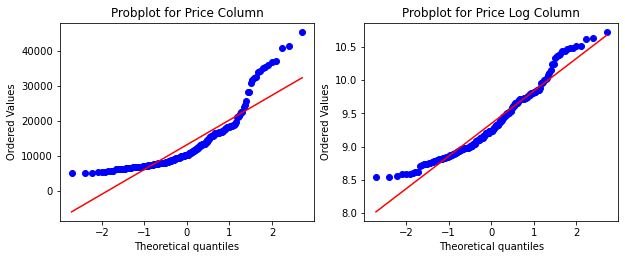

In [80]:
#### Creating a Q-Q Plot for a Normal Distribution

## Function to Create Q-Q Plot 
def qq_plot(vec1, vec2, title_name, color = "blue"):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    
    plt.figure(figsize=(10, 8)).gca() # define axis
    
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1, dist ='norm') ## Plot the left subplot
    ax1.set_title("Probplot for {0} Column".format(title_name))
    ax1.get_lines()[0].set_markerfacecolor(color)
    
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1, dist = 'norm') ## Plot the right subplot
    ax1.set_title("Probplot for {0} Log Column".format(title_name))
    ax1.get_lines()[0].set_markerfacecolor(color)
    
# Passing Price and LogPrice Columns to the Q-Q Plot Function
qq_plot(Auto.loc[:, 'price'], Auto.loc[:, 'LogPrice'], "Price", 'blue')    


With these q-q plots for price, we visually see a greater distance at the top and bottom for Price column. The LogPrice column also has this curvature, but it is not as large. Price Log has a better fit to the line. 

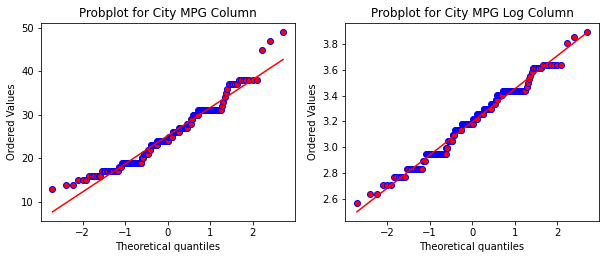

In [81]:
# Passing City MPG and Log City MPG Columns to the Q-Q Plot Function
qq_plot(Auto.loc[:, 'city-mpg'], Auto.loc[:, 'log-city-mpg'], "City MPG", "red")    

With these q-q plots for city-mpg, we visually see a greater distance at the top and bottom for the city-mpg column. The Log City MPG column also has this pattern, but it is not as large and it is closer to the line. Log City MPG is a better fit. 

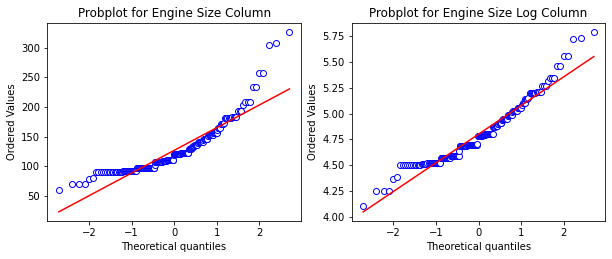

In [82]:
# Passing Engine Size and Log Engine Size Columns to the Q-Q Plot Function
qq_plot(Auto.loc[:, 'engine-size'], Auto.loc[:, 'log-engine-size'], "Engine Size", "white")    

With these q-q plots for engine size, we visually see a greater distance at the top and bottom for the engine size column. The Log engine size column also has this pattern, but the distance is minimal, and it too is closer to the line. Log Engine Size is a better fit. 

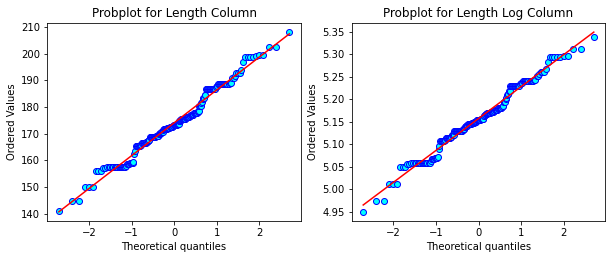

In [83]:
# Passing length and Log length Columns to the Q-Q Plot Function
qq_plot(Auto.loc[:, 'length'], Auto.loc[:, 'loglength'], "Length", "cyan")    

With these q-q plots for length, we visually see a slightly bigger distance at the top and bottom for the Log length column. The regular length column is closer to the normal distribution line and is a better fit than the log length column. 

### 2.) Compute basic summary statistic of the mean by both classical bootstrap and Bayesian methods 

I will move forward with the assignment using one column, specifically the LogPrice Column since it was a better fit to the normal distribution than the Price column.

In [84]:
## Gathering Sample Statistics for LogPrice
Auto.loc[:, "LogPrice"].describe()

# mean  =     9.347955
# std   =     0.497540

count    205.000000
mean       9.347955
std        0.497540
min        8.540519
25%        8.960339
50%        9.239414
75%        9.711116
max       10.723267
Name: LogPrice, dtype: float64

<AxesSubplot:xlabel='LogPrice', ylabel='Density'>

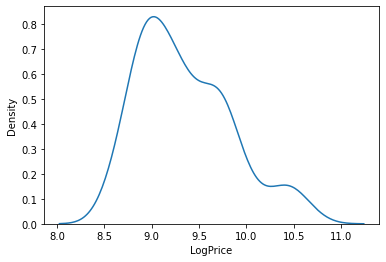

In [85]:
## Creating a density plot of LogPrice to visualize the distribution prior to bootstrapping
sns.kdeplot(Auto.loc[:, "LogPrice"])

##### Bootstrapping LogPrice over 10,000 samples: 

In [101]:
## Function to Plot a Histogram + Confidence Intervals 
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    pyplot.hist(x, alpha=.5)
    pyplot.axvline(x.mean())
    # 95% confidence interval    
    pyplot.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    pyplot.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
    print("Confidence Interval Range: ", 
          np.percentile(x, p/2.)," to " , 
          np.percentile(x, 100-p/2.))


Confidence Interval Range:  9.280890487287692  to  9.415905351982584
--------------------------
Bootstrapping Price Mean: 
9.347757177684471


LogPrice Sample Mean: 
9.347954638082927
--------------------------


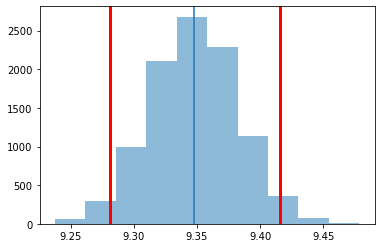

In [109]:
## Bootstrapping the LogPrice Mean
n = 10000  # going to conduct 10,000 realizations 

LogPrice_bootstrap_means = pd.Series([
    Auto.sample(frac=1, replace=True).LogPrice.mean()
    for i in range(n)])

## Plotting the Distribution of Bootstrapped LogPrice Means 
plot_hist(LogPrice_bootstrap_means)


## Printing out the Values of the Bootstrapped Mean & Std vs Sample Mean & Std 
print("--------------------------")
print("Bootstrapping Price Mean: ")
print(LogPrice_bootstrap_means.mean())

print("\n")

print("LogPrice Sample Mean: ")
print(Auto.loc[:, "LogPrice"].mean())

print("--------------------------")


Confidence Interval Range:  0.44841737909497065  to  0.5413873093300138
--------------------------
Bootstrapping Price Std: 
0.49597913773704105


LogPrice Sample Std: 
0.4975398650134552
--------------------------


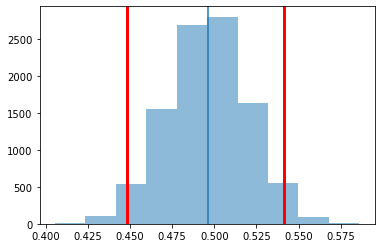

In [110]:
## Bootstrapping the LogPrice Std
n = 10000  # going to conduct 10,000 realizations 

## Bootstrapping the Standard Deviation 
LogPrice_bootstrap_std = pd.Series([
    Auto.sample(frac=1, replace=True).LogPrice.std()
    for i in range(n)])


## Plotting the Distribution of Bootstrapped LogPrice Standard Deviations   
plot_hist(LogPrice_bootstrap_std)


## Printing out the Values of the Bootstrapped Mean & Std vs Sample Mean & Std 
print("--------------------------")
print("Bootstrapping Price Std: ")
print(LogPrice_bootstrap_std.mean()) # mean standard deviation 

print("\n")

print("LogPrice Sample Std: ")
print(Auto.loc[:, "LogPrice"].std())
print("--------------------------")


##### Bayesian Method for Mean

In [123]:
## Defining functions to calculate posterior & likelihood, mean, and standard deviation

def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

def likelihood(p, data):
    k = sum(data)
    N = len(data)
    # Compute Binomial likelihood
    l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k)
    # Normalize the likelihood to sum to unity
    return l/sum(l)


Mean = 9.350, Standard deviation = 0.516


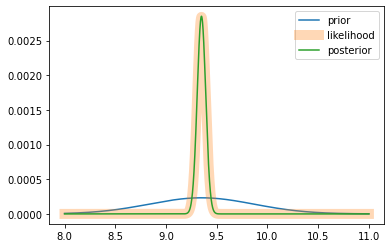

In [145]:
## Creating a Prior Distribution of LogPrice 

N = 10000 
p = np.linspace(8, 11, num=N) 

num_samples = 150 # number of samples from sample dataset 
Auto_samples = Auto.sample(n=num_samples) # sampling dataset without replacement 


pp_price = ss.norm.pdf(p, loc=Auto_samples.LogPrice.mean(), 
                          scale=Auto_samples.LogPrice.std())

pp_price = pp_price / pp_price.sum() # normalize

like_price = comp_like(p, Auto_samples.LogPrice)
post_price = posterior(pp_price, like_price)

pyplot.plot(p, pp_price, label='prior')
pyplot.plot(p, like_price, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_price, label='posterior')
pyplot.legend()

### 3.) Compute confidence intervals for the summary statistics by classical bootstrap and Bayesian methods

### 4.) Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are statistically significant. You will continue the analysis that you started in Assignment 04. For each of the groupings you analyzed in Assignment 04, apply the following methods:

   -  Bootstrap methods
   -  Bayesian model


### 5.) Compare the results from step 4 above with those you found in Assignment 04 with classical t-tests, Tukey HSD, and ANOVA.